*Laboratorio di Simulazione Numerica- Cecilia Almagioni*

# Esercitazione 7

In questa esercitazione ho condotto simulazioni su un ensemble canonico (numero di particelle, volume e temperatura fissata: NVT) in stato solido, liquido e gassoso, a rispettive diverse temperature.

### Esercizio 7.1

Ci è stato fornito un codice già funzionante che sfrutta l'algoritmo di Metropolis per simulare un ensemble canonico caratterizzato da p$N=108$ particelle descritto da potenziale di Lennard-Jones e per calcolarne: energia totale per particella $E/N$, energia potenziale per particella $U/N$, energia cinetica per particella $K/N$ e temperatura $T$. Il programma legge un file di input dal quale salva i valori per la densità $\rho$, il raggio di cut-off $r_{cut}$, il passo $\delta$, la temperatura iniziale $T$ diversi per ogni stato su cui si conduce la simulazione.

Il programma è dunque del tutto analogo al programma dell'esercitazione 4, ad eccezione dell'algoritmo utilizzato per la simulazione: dinamica molecolare con algoritmo di Verlet per l'esercitazione 4, Munte Carlo conalgoritmo di Metropolis per questa esercitazione. Si può passare da una modalità all'altra inserendo il comando `iNVET=0` (MD) oppure `iNVET=1` (MC) nel file di input. 

Nell'esercitazione 4 abbiamo approssimato l'interazione tra coppie di particelle considerandola nulla al di fuori del raggio di *cut-off*. In questo esercizio ho aggiuto delle correzioni di coda per l'energia potenziale e per la pressione:

$$\frac{\langle U\rangle_{tail}}{N} = \frac{8\pi\rho\epsilon}{9r_c^9}-\frac{8\pi\rho\epsilon}{3r_c^3} \qquad \frac{\langle W\rangle_{tail}}{3N\epsilon} = 32\pi\rho \left[\frac{1}{r_c^9}-\frac{1}{6r_c^3}\right]$$

dove $\rho$ e $r_c$ sono in unità di $\sigma$ e pongo $\sigma=\epsilon=1$.

Ho iniziato equilibrando il sistema.

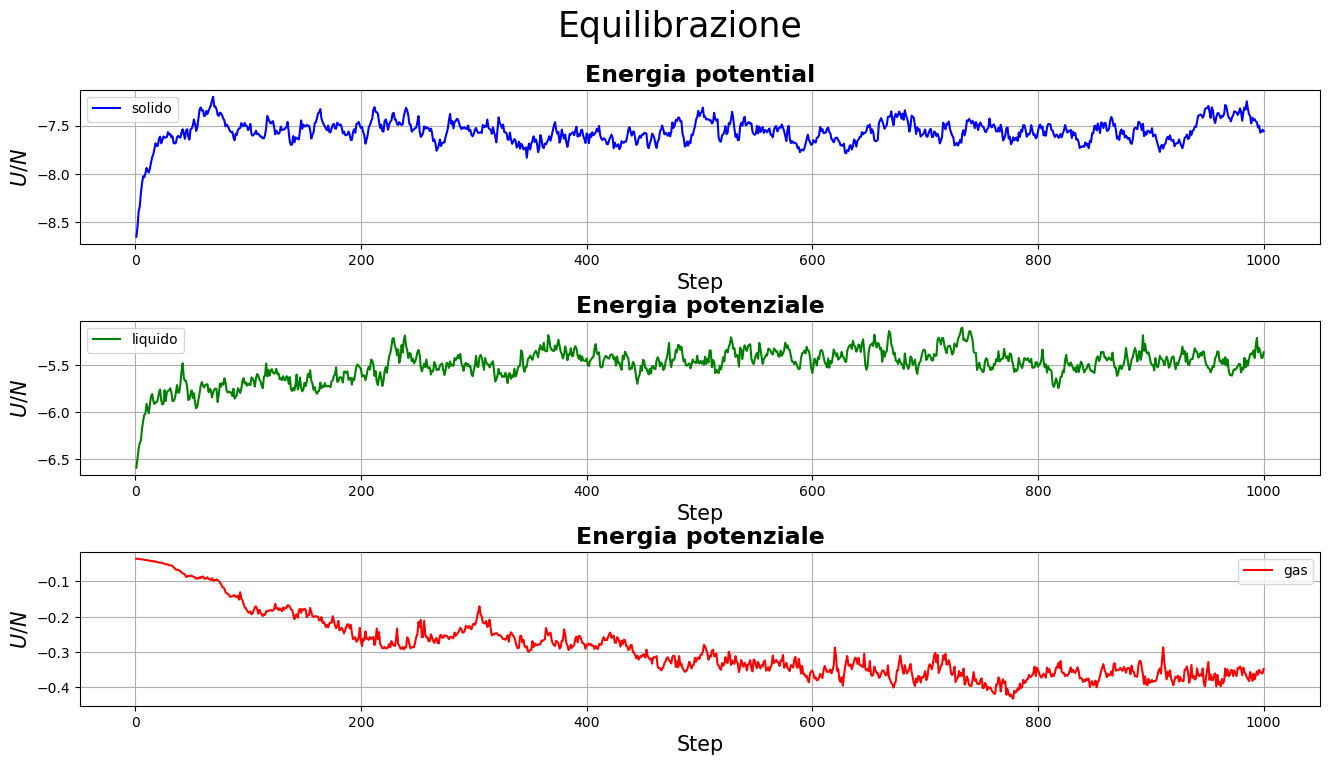

In [3]:
import matplotlib.pyplot as plt
import numpy as np



xS, yS = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/eqS_output_epot.dat",unpack=True,usecols=(0, 1))

xL, yL = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/eqL_output_epot.dat",unpack=True,usecols=(0, 1))

xG, yG = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/eqG_output_epot.dat",unpack=True,usecols=(0, 1))

plt.figure(figsize=(16,8))
plt.suptitle("Equilibrazione", fontsize = 25)


plt.subplot(3,1,1)
plt.plot(xS, yS, marker='', label='solido', color = "b")
plt.title('Energia potenziale', fontsize = 17, fontweight = "bold")
plt.ylabel('$U/N$', fontsize = 15)
plt.xlabel('Step', fontsize = 15)
plt.grid(True)
plt.legend()
plt.subplots_adjust(hspace=0.5)
    
plt.subplot(3,1,2)
plt.plot(xL, yL, marker='', label='liquido', color = "g")
plt.title('Energia potenziale', fontsize = 17, fontweight = "bold")
plt.ylabel('$U/N$', fontsize = 15)
plt.xlabel('Step', fontsize = 15)
plt.grid(True)
plt.legend()
plt.subplots_adjust(hspace=0.5)
    
plt.subplot(3,1,3)
plt.plot(xG, yG, marker='', label='gas', color = "r")
plt.title('Energia potenziale' , fontsize = 17, fontweight = "bold")
plt.ylabel('$U/N$', fontsize = 15)
plt.xlabel('Step', fontsize = 15)
plt.grid(True)
plt.legend()
plt.subplots_adjust(hspace=0.5)

plt.show()

### Esercizio 7.2

In questo esercizio ho utilizzato il codice da me completato per indagare autocorrelazione ed incertezze statistiche. I parametri utlizzati sono i seguenti:

1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$), $\delta =0.1$ 
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$), $\delta=0.25$
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$) $\delta=3.0$

Il parametro $\delta$ è l'ampiezza del passo Monte Carlo, fissato per avere un'*acceptance rate* del 50% circa nel caso di fase liquida e fase solida, mentre per quella gassosa non è stato possibile scendere oltre al 65%.

Ho dunque salvato 500000 stime ($5\cdot 10^5$ blocchi da uno step) per i valori di energia potenziale per particella $U/N$ e pressione $P$.

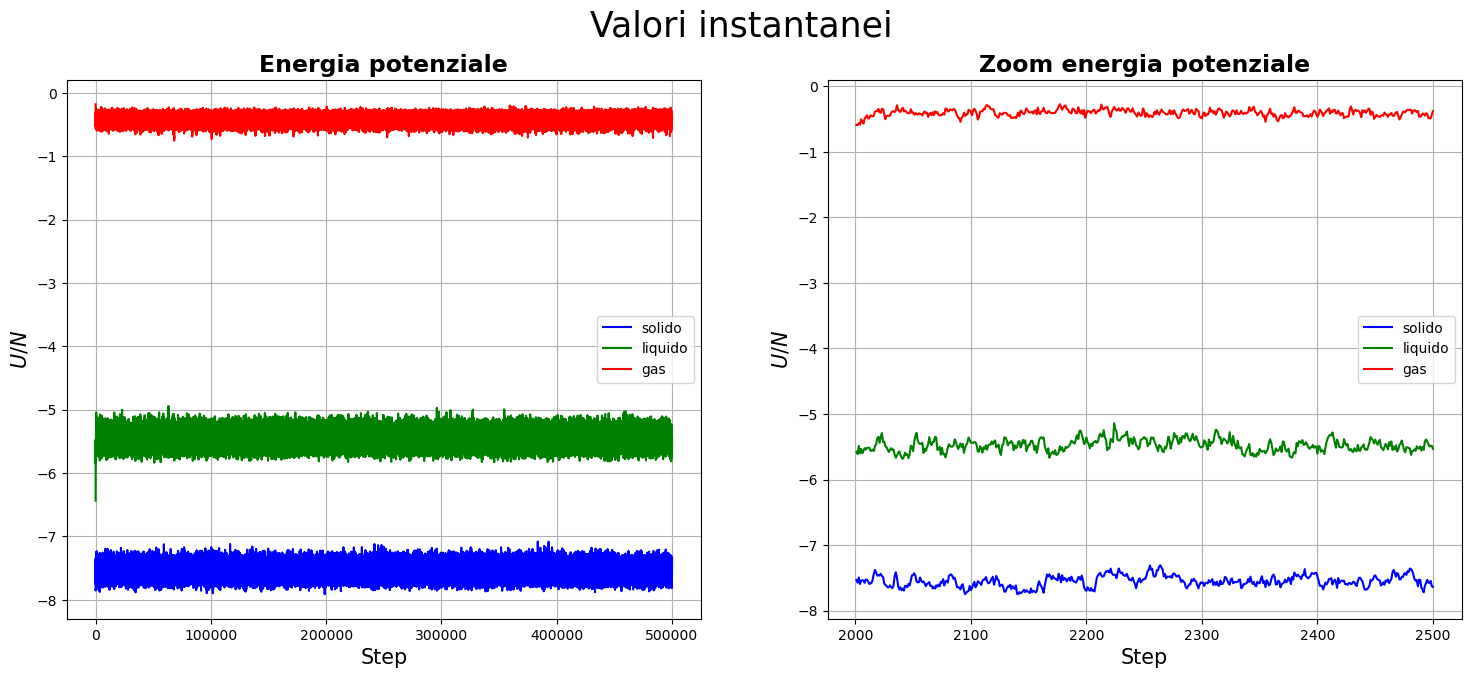

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

xS, yS = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/Soutput_epot.dat",unpack=True,usecols=(0, 1))

xL, yL = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/Loutput_epot.dat",unpack=True,usecols=(0, 1))

xG, yG = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/Goutput_epot.dat",unpack=True,usecols=(0, 1))

plt.figure(figsize=(18,7))
plt.suptitle("Valori instantanei", fontsize = 25)

plt.subplot(1,2,1)
plt.plot(xS, yS, marker='', label='solido', color = 'b')
plt.plot(xL, yL, marker='', label='liquido', color = 'g')
plt.plot(xG, yG, marker='', label='gas', color = 'r')
plt.title('Energia potenziale', fontsize = 17, fontweight = "bold")
plt.ylabel('$U/N$', fontsize = 15)
plt.xlabel('Step', fontsize = 15)
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(xS[2000:2500], yS[2000:2500], marker='', label='solido', color = 'b')
plt.plot(xL[2000:2500], yL[2000:2500], marker='', label='liquido', color = 'g')
plt.plot(xG[2000:2500], yG[2000:2500], marker='', label='gas', color = 'r')
plt.title('Zoom energia potenziale', fontsize = 17, fontweight = "bold")
plt.ylabel('$U/N$', fontsize = 15)
plt.xlabel('Step', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

Si può osservare dome valori successivi di $U/N$ risultino correlati. Per confermare e quantificare ciò che appare a prima vista, ho calcolato il tempo di autocorrelazione $\tau$ in unità di step Monte Carlo. Conoscere questo tempo è importante per poter effettuare un data blocking con un numero adeguato di elementi nel blocco. Infatti, se i dati di un blocco sono correlati tra di loro la dispersione dei dati è minore e l'incertezza statistica viene sottostimata.
\
La formula utilizzata per il calcolo dell'autocorrelazione in funzione del numero di step e implementata nel seguente specchietto Python è la seguente:

$$\chi(t) = \frac{\frac{1}{t_{max}-t}\sum_{0}^{t_{max}-t}m(t')m(t'+t)-\frac{1}{t_{max}-t}\sum_{0}^{t_{max}-t}m(t')\cdot\frac{1}{t_{max}-t}\sum_{0}^{t_{max}-t}m(t'+t)}{\frac{1}{t_{max}}\sum_{0}^{t_{max}}m^2(t')-\left(\frac{1}{t_{max}}\sum_{0}^{t_{max}}m(t')\right)^2}$$

La previsione teorica è che la funzione abbia un andamento esponenziale che decade in circa 100 passi.



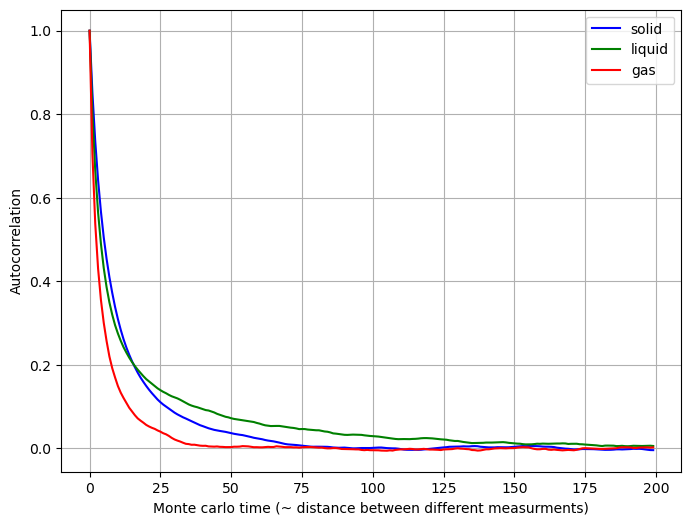

In [21]:
M = 500000

tmax = M
taumax = 200 

plt.figure(figsize=(8,6))

chiS = []
chiL = []
chiG = []

#solid

for tau in range(taumax):

    sum1=0
    sum2=0
    sum3=0
    sum4=0
    sum5=0
    
    for tp in range(tmax-tau):
        sum1+=yS[tp]*yS[tp+tau]
        sum2+=yS[tp]
        sum3+=yS[tp+tau]
        
    for tp in range(tmax):
        sum4+=yS[tp]*yS[tp]
        sum5+=yS[tp]
        
    numS = (sum1 - sum2 * sum3/(tmax - tau))/(tmax - tau)
    denS = (sum4/tmax - (sum5/tmax) * (sum5/tmax))
    
    chiS.append(numS/denS)
    
for tau in range(taumax):

    sum1=0
    sum2=0
    sum3=0
    sum4=0
    sum5=0
    
    for tp in range(tmax-tau):
        sum1+=yL[tp]*yL[tp+tau]
        sum2+=yL[tp]
        sum3+=yL[tp+tau]
        
    for tp in range(tmax):
        sum4+=yL[tp]*yL[tp]
        sum5+=yL[tp]
        
    numL = (sum1 - sum2 * sum3/(tmax - tau))/(tmax - tau)
    denL = (sum4/tmax - (sum5/tmax) * (sum5/tmax))
    
    chiL.append(numL/denL)
    
for tau in range(taumax):

    sum1=0
    sum2=0
    sum3=0
    sum4=0
    sum5=0
    
    for tp in range(tmax-tau):
        sum1+=yG[tp]*yG[tp+tau]
        sum2+=yG[tp]
        sum3+=yG[tp+tau]
        
    for tp in range(tmax):
        sum4+=yG[tp]*yG[tp]
        sum5+=yG[tp]
        
    numG = (sum1 - sum2 * sum3/(tmax - tau))/(tmax - tau)
    denG = (sum4/tmax - (sum5/tmax) * (sum5/tmax))
    
    chiG.append(numG/denG)
        
plt.plot(chiS, color = 'b', label = 'solid')
plt.plot(chiL, color = 'g', label = 'liquid')
plt.plot(chiG, color = 'r', label = 'gas')

plt.xlabel("Monte carlo time (~ distance between different measurments)")
plt.ylabel("Autocorrelation")
plt.legend()
plt.grid()

plt.show()


Si osserva dal grafico come per tutte e tre le fasi i tempi di decadimento dell'autocorrelazione sono inferiori a 25 step: per avere dati sufficientemente scorrelati tra di loro è sufficiente considerare blocchi da 100-200 step.

Nel seguente specchietto Python riporto l'andamento dell'incertezza statistica sulla stima di $U/N$ in funzione del numero $L$ di elementi nel blocco ($L=M/N$, dove $M$ è il numero complessivo di step e $N$ il numero di blocchi). Per quanto detto sopra mi aspetto che l'errore aumenti col crescere di $L$ fino a stabilizzarsi dopo qualche centinaio. Ho fatto girare il programma con un range di $L$ da $10$ a $5000$. 
\
Per motivi di rapidità, nel seguente specchietto $L$ incrementa di $10$ in $10$. Ho eseguito una volta anche la simulazione per ogni valore di $L$ nel range, riporto in fondo l'immagine del grafico ma ho tolto lo specchietto perchè se fatto girare impiega molte ore.

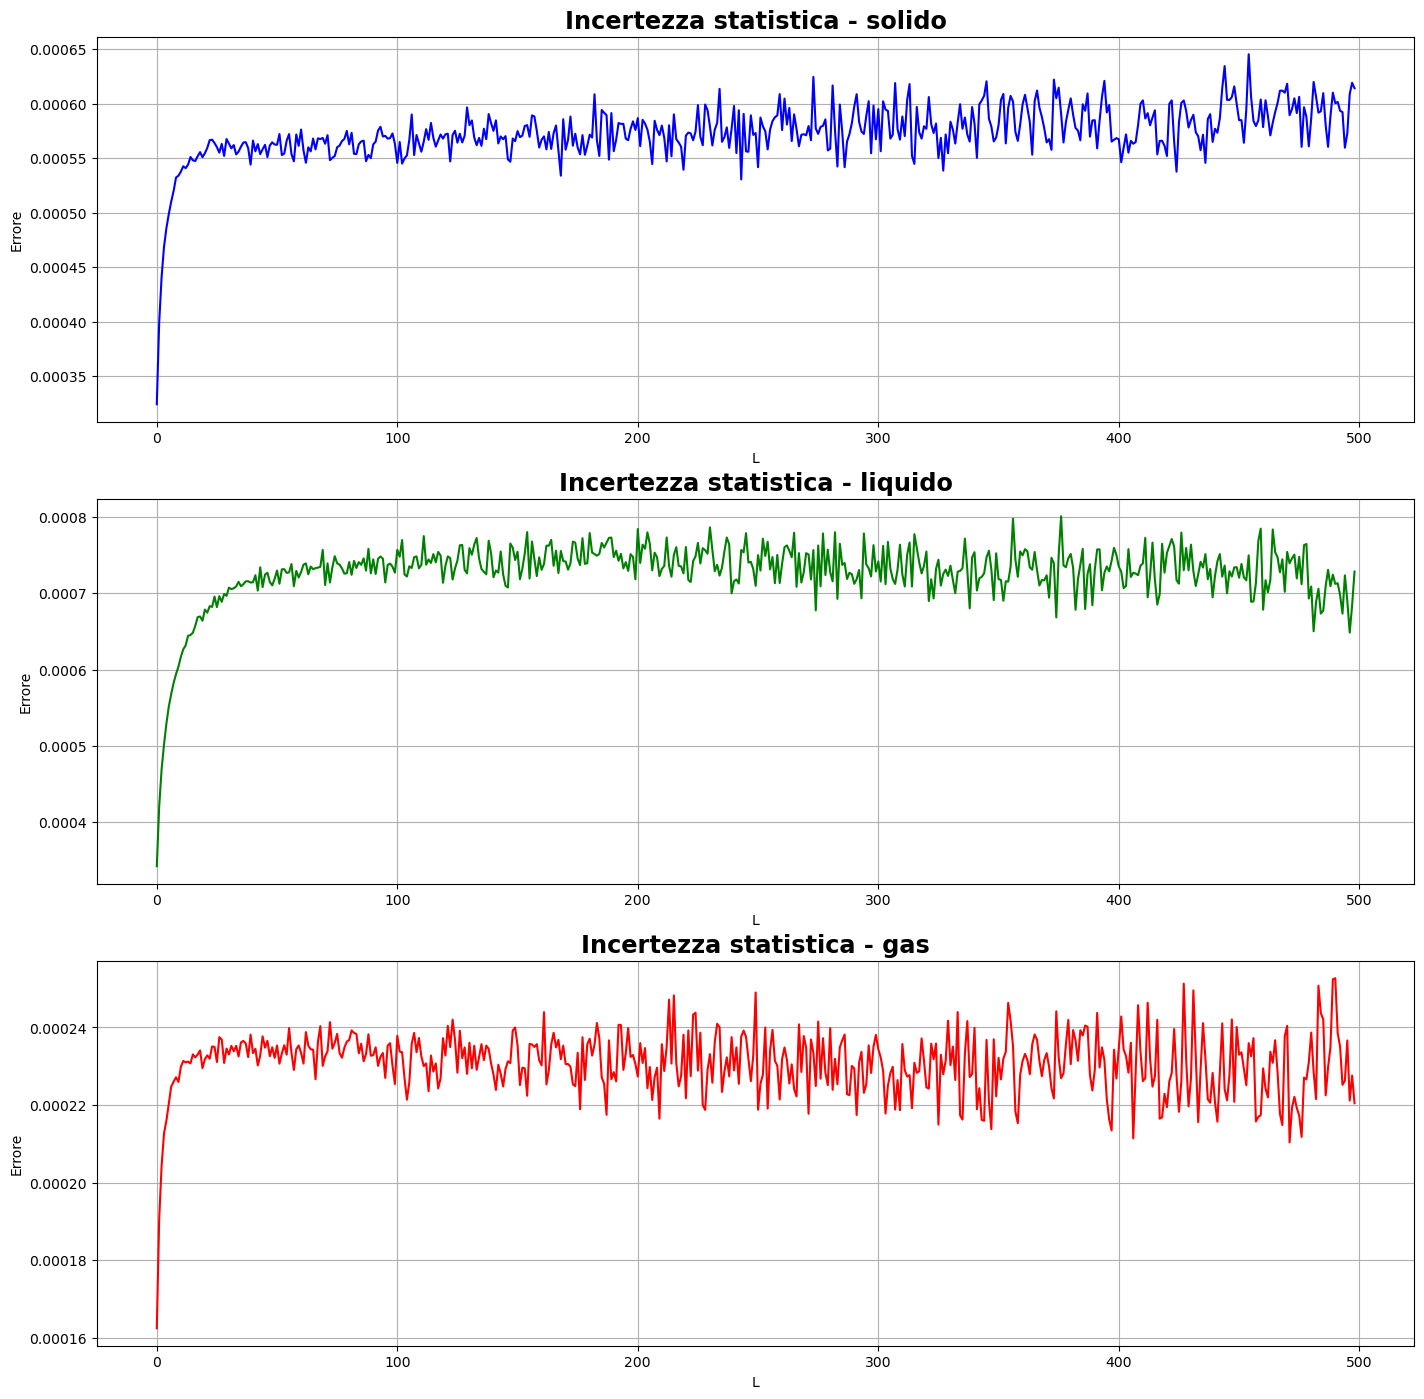

Simulazione condotta con L campionato tra 10 e 5000 con passi di 1


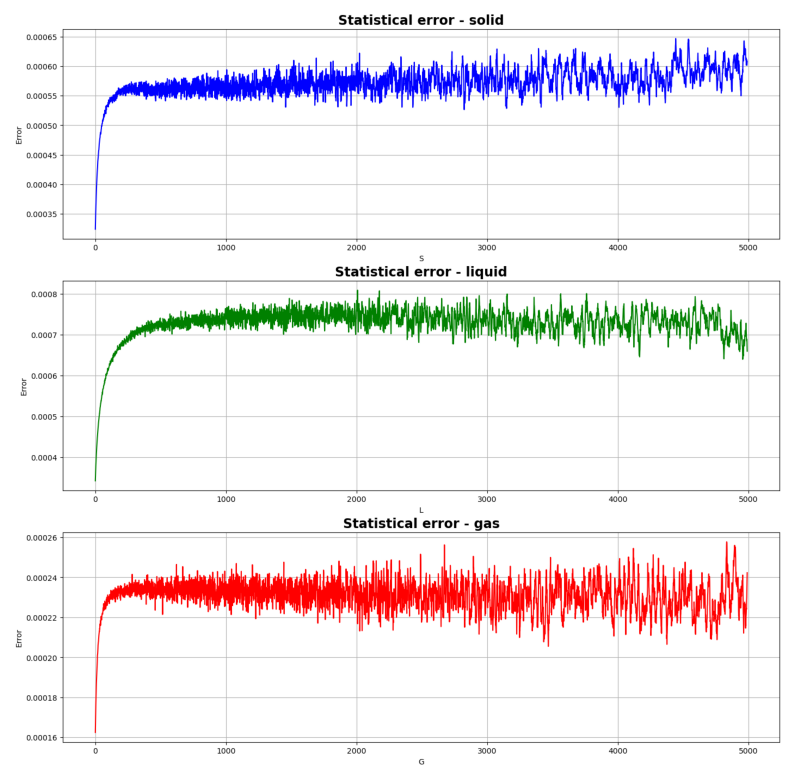

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def error(ave, ave2, n):
    if(n==0): 
        return 0
    return np.sqrt((ave2-ave**2)/n)

xS, yS = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/Soutput_epot.dat",unpack=True,usecols=(0, 1))

xL, yL = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/Loutput_epot.dat",unpack=True,usecols=(0, 1))

xG, yG = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/Goutput_epot.dat",unpack=True,usecols=(0, 1))


M = 500000


Lmin = 10 #10
Lmax = 5000

errS = []
errL = []
errG = []


#solid

for L in range(Lmin, Lmax):
    
    if L%10==0:
    
        N = int(M/L) #50
    
        ave = np.zeros(N)
        av2 = np.zeros(N)
        sum_prog = np.zeros(N)
        su2_prog = np.zeros(N)
        err_prog = np.zeros(N)
    
        for i in range(N):
            sum1 = 0 
            for j in range(L): #60
                k = j+i*L
                sum1 += yS[k] 
                ave[i] = sum1/L      
                av2[i] = (ave[i])**2 

        for i in range(N):
            for j in range(i+1):
                sum_prog[i] += ave[j] 
                su2_prog[i] += av2[j] 
            sum_prog[i]/=(i+1) 
            su2_prog[i]/=(i+1) 
            err_prog[i] = error(sum_prog[i],su2_prog[i],i) 
        
        errS.append(err_prog[i])
    
#liquid    

for L in range(Lmin, Lmax):
    if L%10==0:
    
        N = int(M/L)
    
        ave = np.zeros(N)
        av2 = np.zeros(N)
        sum_prog = np.zeros(N)
        su2_prog = np.zeros(N)
        err_prog = np.zeros(N)
    
        for i in range(N):
            sum1 = 0
            for j in range(L):
                k = j+i*L
                sum1 += yL[k] 
                ave[i] = sum1/L      
                av2[i] = (ave[i])**2 

        for i in range(N):
            for j in range(i+1):
                sum_prog[i] += ave[j] 
                su2_prog[i] += av2[j] 
            sum_prog[i]/=(i+1) 
            su2_prog[i]/=(i+1) 
            err_prog[i] = error(sum_prog[i],su2_prog[i],i) 
        
        errL.append(err_prog[i]) 
    
#gas
for L in range(Lmin, Lmax):
    if L%10==0:
    
        N = int(M/L)
    
        ave = np.zeros(N)
        av2 = np.zeros(N)
        sum_prog = np.zeros(N)
        su2_prog = np.zeros(N)
        err_prog = np.zeros(N)
    
        for i in range(N):
            sum1 = 0
            for j in range(L):
                k = j+i*L
                sum1 += yG[k] 
                ave[i] = sum1/L      
                av2[i] = (ave[i])**2 

        for i in range(N):
            for j in range(i+1):
                sum_prog[i] += ave[j] 
                su2_prog[i] += av2[j] 
            sum_prog[i]/=(i+1) 
            su2_prog[i]/=(i+1) 
            err_prog[i] = error(sum_prog[i],su2_prog[i],i) 
        
        errG.append(err_prog[i])
  
x = np.arange(len(errS))    

fig=plt.figure(figsize=(17, 17))

plt.subplot(3,1,1)

plt.title("Incertezza statistica - "+'solido', size='xx-large', weight='bold')
plt.plot(x, errS, label = 'solido', color = 'b')
plt.ylabel("Errore")
plt.xlabel('L')
plt.grid(True)

plt.subplot(3,1,2)
plt.title("Incertezza statistica - "+'liquido', size='xx-large', weight='bold')
plt.plot(x, errL, label = 'liquido', color = 'g')
plt.ylabel("Errore")
plt.xlabel('L')
plt.grid(True)

plt.subplot(3,1,3)
plt.title("Incertezza statistica - "+'gas', size='xx-large', weight='bold')
plt.plot(x, errG, label = 'gas', color = 'r')
plt.ylabel("Errore")
plt.xlabel('L')
plt.grid(True)

plt.show()

print('Simulazione condotta con L campionato tra 10 e 5000 con passi di 1')

image = Image.open('/home/cecilia/Scrivania/LabSN/Esercitazioni/Python/7_incertezza statistica.png')  

# Mostra l'immagine
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  
plt.show()

    
    

Come atteso si osserva come l'incertezza statistica sia sottostimata quando il blocco è troppo piccolo. L'incertezza si stabilizza con blocchi di più di $1000$ elementi.

### Esercizio 7.3

In questo esercizio ho utilizzato i risultati delle simulazioni sull'incertezza statistica per scegliere i parametri del data bloking. Ho impostato $N=50$ e $L=2000$.

Nel codice fornito ho dovuto aggiungere il calcolo della funzione radiale $g(r)$, probabilità che una coppia di particelle si trovi ad una distanza compresa tra $r$ e $r+dr$ per $r\in[0, L/2]$. 
\
L'espressione della $g(r)$ è:
$$g(r) = \frac{1}{N\Delta V(r)}\left\langle\sum_{i=0}^{N}\sum_{j=1,j\neq i}^{N}\delta(r-|\vec(r_i)-\vec(r_j)|)\right\rangle$$

dove $\Delta V(r)= \frac{4\pi}{3}[(r+dr)^3-r^3]$.

Per calcolare $g(r)$ per $r\in[0, L/2]$ ho suddiviso l'intervallo in $100$ sottointervalli per creare un istogramma da $100$ bin. Per il calcolo dell'energia potenziale e della pressione avevo già due cicli $for$ per calcolare la distanza tra tutte le particelle del sistema. Dunque date due particelle e la loro distanza `dr`, se questa rientra nell'intervallo $r\in[0, L/2]$ l'indice dell'istogramma da aggiornare (con $+2$ perché le particelle sono due) è:    $index = 100\cdot\frac{dr}{L/2}$. Alla fine del conto la funzione viene normalizzata.

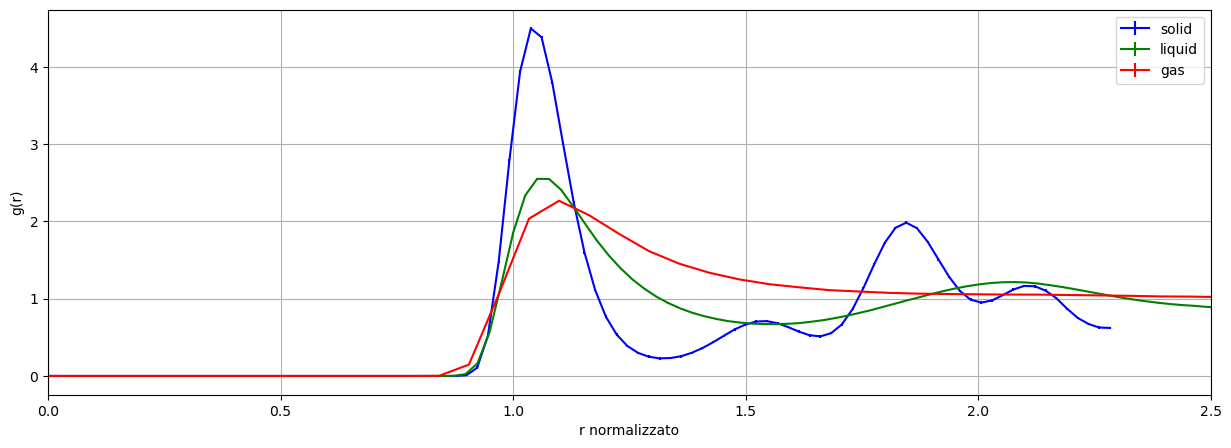

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


N = 100


#solid

datS = np.zeros((50,N))

for i in range(N):
    datS[:,i]=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/Sprova_gdr.dat",unpack=True,usecols=(i))

    
gS = np.zeros(N)

for i in range(N):
    gS[i] = np.mean(datS[:,i])
    errS = np.std(datS[:,i])
  
#liquid

datL = np.zeros((50,N))
    
for i in range(N):
    datL[:,i]=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/Lprova_gdr.dat",unpack=True,usecols=(i))

    
gL = np.zeros(N)

for i in range(N):
    gL[i] = np.mean(datL[:,i])
    errL = np.std(datL[:,i])
    
#gas

datG = np.zeros((50,N))
    
for i in range(N):
    datG[:,i]=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/G_gdr.dat",unpack=True,usecols=(i))

    
gG = np.zeros(N)

for i in range(N):
    gG[i] = np.mean(datG[:,i])
    errG = np.std(datG[:,i])
   
x = np.arange(0,N)
    

LS = ((1.1/108)**(-1/3))/200
LL = ((0.8/108)**(-1/3))/200
LG = ((0.05/108)**(-1/3))/200

fig=plt.figure(figsize=(15, 5))
plt.errorbar(x*LS, gS, yerr=errS, color = 'b', label = 'solid')
plt.errorbar(x*LL, gL, yerr=errL, color = 'g', label = 'liquid')
plt.errorbar(x*LG, gG, yerr=errG, color = 'r', label = 'gas')
plt.xlabel('r normalizzato')
plt.ylabel('g(r)')
plt.xlim(0,2.5)
plt.legend()
plt.grid(True)
#plt.title('Valore medio')
plt.show()
    


Il profilo della $g(r)$ è compatibile con il potenziale di Lennard-Jones:si osservano i picchi dei gusci di primi vicini in tutte e tre le fasi, per solido e liquido anche di secondi vicini e per il solido anche i successivi. Si osserva anche che il potenziale repulsivo impedisce alle particelle di trovarsi al di sotto di una certa distanza.  Le barre di errore sono molto piccole.

### Esercizio 7.4

Infine, utilizzo il codice completato per condurre una simulazione Monte Carlo di un sistema di $108$ particelle di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in tutte e tre le diverse fasi in condizioni canoniche NVT con potenziale di Lennard-Jones nelle condizioni riportate sopra (esercizio 7.2).


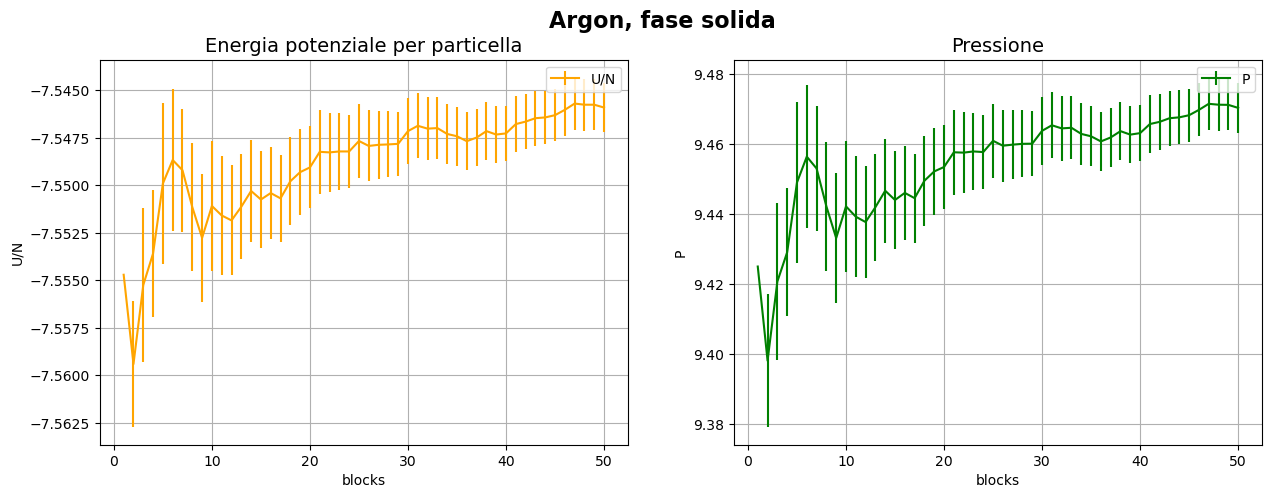

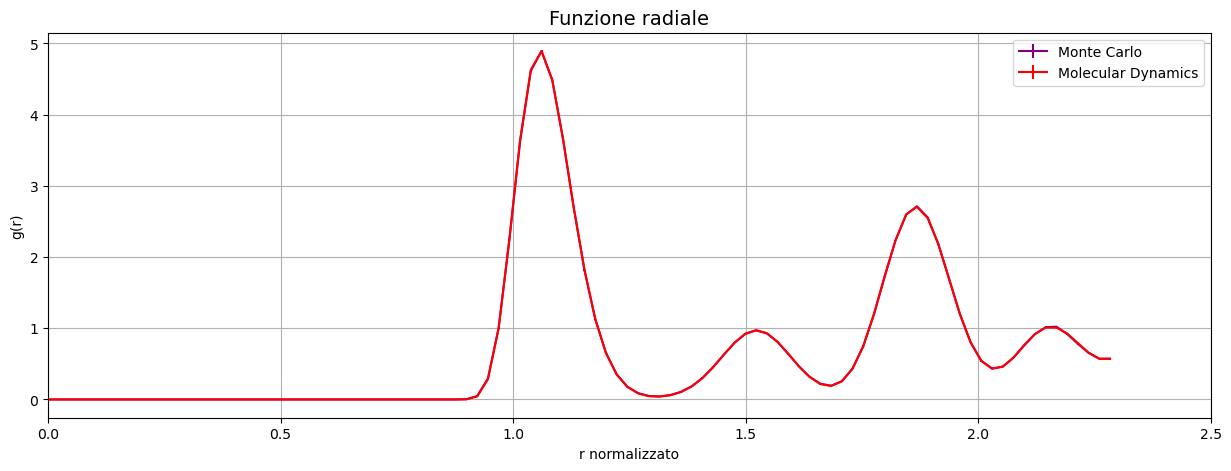

In [61]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x, U, errU=np.loadtxt("//home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/S_epot.dat", unpack=True, usecols=(0,2,3))
x2, P, errP=np.loadtxt("//home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/S_pres.dat", unpack=True, usecols=(0,2,3))


    
    
plt.figure(figsize=(15,5))
plt.suptitle('Argon, fase solida',fontweight='bold',fontsize=16)

plt.subplot(121)
plt.errorbar(x,U,errU,label='U/N', color = "orange")
plt.title('Energia potenziale per particella',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('U/N')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(x2,P,errP,label='P', color = "green")
plt.title('Pressione',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('P')
plt.grid(True)
plt.legend()


plt.show()



N = 100


datS = np.zeros((50,N))
datSMD = np.zeros((50,N))

for i in range(N):
    datS[:,i]=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/S_gdr.dat",unpack=True,usecols=(i))

    
gS = np.zeros(N)

for i in range(N):
    gS[i] = np.mean(datS[:,i])
    errS = np.std(datS[:,i])
datS = np.zeros((50,N))

for i in range(N):
    datSMD[:,i]=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/S_gdr_MD.dat",unpack=True,usecols=(i))

    
gSMD = np.zeros(N)

for i in range(N):
    gSMD[i] = np.mean(datSMD[:,i])
    errSMD= np.std(datS[:,i])
   

   
x = np.arange(0,N)
    

LS = ((1.1/108)**(-1/3))/200


fig=plt.figure(figsize=(15, 5))
plt.title('Funzione radiale',fontsize=14)
plt.errorbar(x*LS, gS, yerr=errS, color = 'purple', label = 'Monte Carlo')
plt.errorbar(x*LS, gSMD, yerr=errSMD, color = 'r', label = 'Molecular Dynamics')
plt.xlabel('r normalizzato')
plt.ylabel('g(r)')
plt.xlim(0,2.5)
plt.legend()
plt.grid(True)
#plt.title('Valore medio')
plt.show()

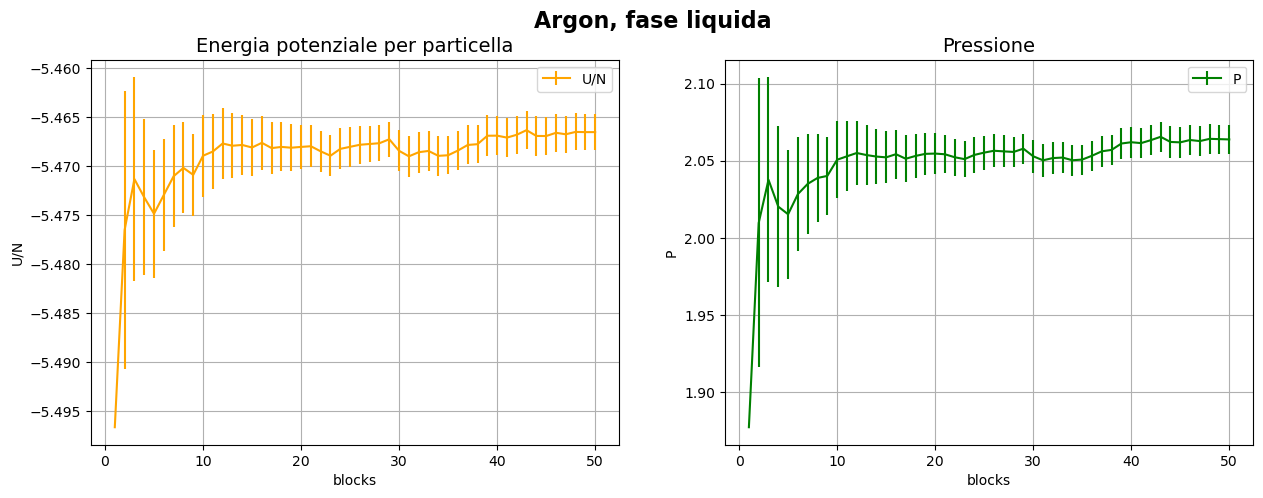

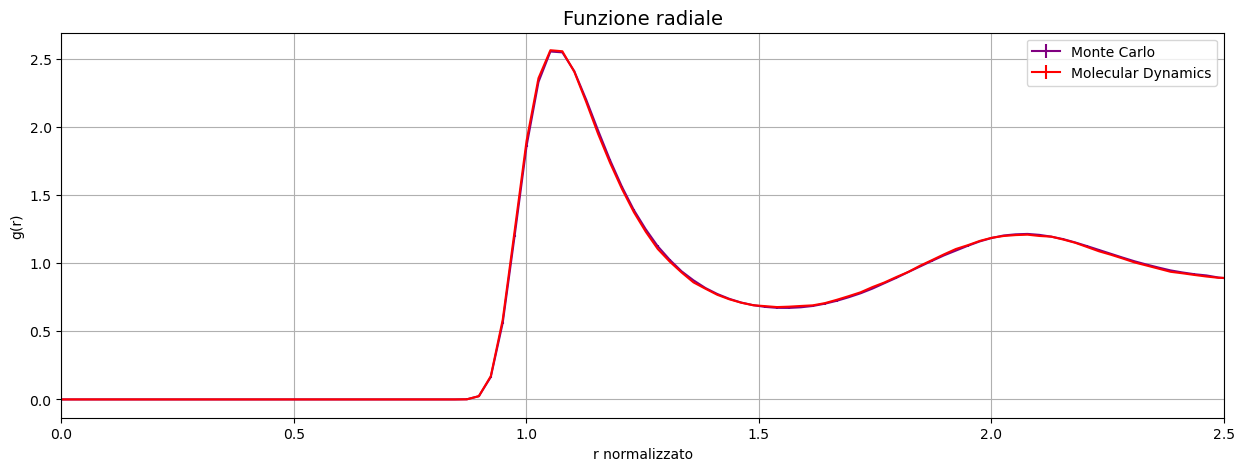

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x, U, errU=np.loadtxt("//home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/L_epot.dat", unpack=True, usecols=(0,2,3))
x2, P, errP=np.loadtxt("//home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/L_pres.dat", unpack=True, usecols=(0,2,3))

   
    
plt.figure(figsize=(15,5))
plt.suptitle('Argon, fase liquida',fontweight='bold',fontsize=16)

plt.subplot(121)
plt.errorbar(x,U,errU,label='U/N', color = "orange")
plt.title('Energia potenziale per particella',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('U/N')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(x2,P,errP,label='P', color = "green")
plt.title('Pressione',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('P')
plt.grid(True)
plt.legend()


plt.show()


#g(r)

N = 100


datL = np.zeros((50,N))
datLMD = np.zeros((50,N))

for i in range(N):
    datL[:,i]=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/L_gdr.dat",unpack=True,usecols=(i))

    
gL = np.zeros(N)

for i in range(N):
    gL[i] = np.mean(datL[:,i])
    errL = np.std(datL[:,i])
datL = np.zeros((50,N))

for i in range(N):
    datLMD[:,i]=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/L_gdr_MD.dat",unpack=True,usecols=(i))

    
gLMD = np.zeros(N)

for i in range(N):
    gLMD[i] = np.mean(datLMD[:,i])
    errLMD= np.std(datL[:,i])
   

   
x = np.arange(0,N)
    

LL = ((0.8/108)**(-1/3))/200


fig=plt.figure(figsize=(15, 5))
plt.title('Funzione radiale',fontsize=14)
plt.errorbar(x*LL, gL, yerr=errL, color = 'purple', label = 'Monte Carlo')
plt.errorbar(x*LL, gLMD, yerr=errLMD, color = 'r', label = 'Molecular Dynamics')
plt.xlabel('r normalizzato')
plt.ylabel('g(r)')
plt.xlim(0,2.5)
plt.legend()
plt.grid(True)
#plt.title('Valore medio')
plt.show()

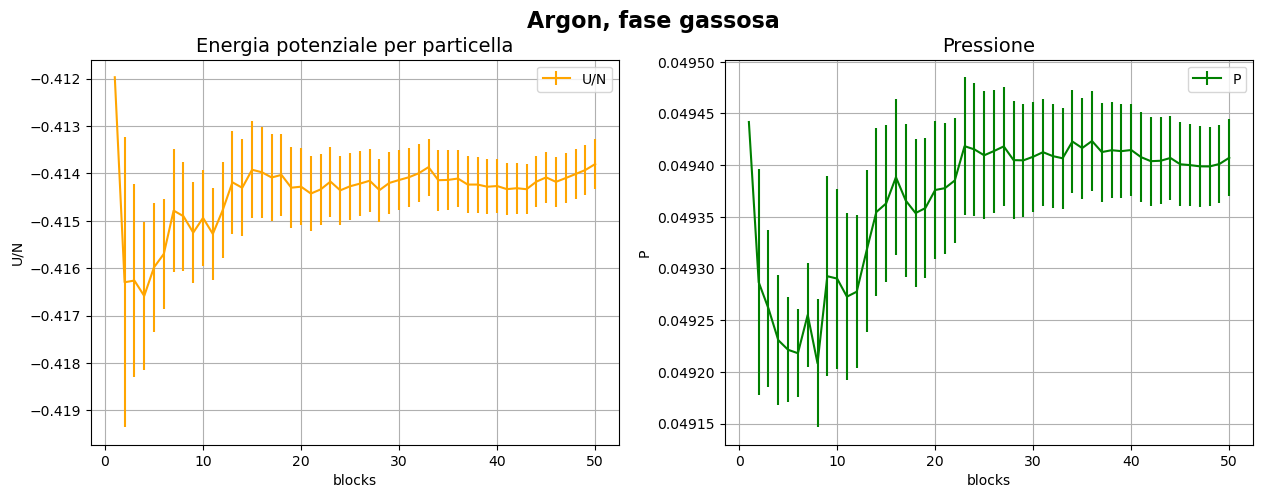

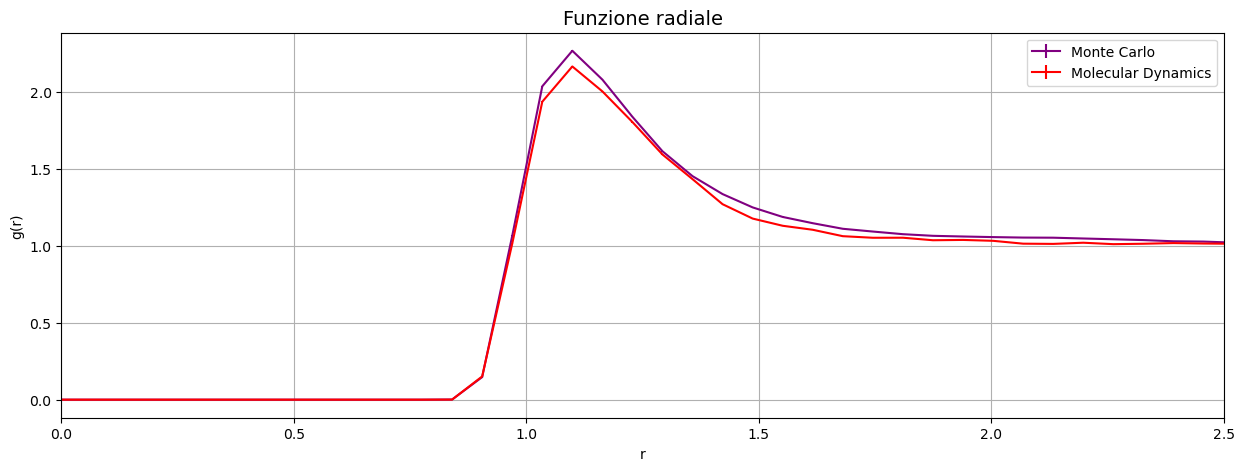

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x, U, errU=np.loadtxt("//home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/G_epot.dat", unpack=True, usecols=(0,2,3))
x2, P, errP=np.loadtxt("//home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/G_pres.dat", unpack=True, usecols=(0,2,3))


    
    
plt.figure(figsize=(15,5))
plt.suptitle('Argon, fase gassosa',fontweight='bold',fontsize=16)

plt.subplot(121)
plt.errorbar(x,U,errU,label='U/N', color = "orange")
plt.title('Energia potenziale per particella',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('U/N')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(x2,P,errP,label='P', color = "green")
plt.title('Pressione',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('P')
plt.grid(True)
plt.legend()


plt.show()

#g(r)

N = 100

datS = np.zeros((50,N))
gS = np.zeros(N)
datSMD = np.zeros((50,N))
gSMD = np.zeros(N)

for i in range(N):
    datS[:,i]=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/G_gdr.dat",unpack=True,usecols=(i))


for i in range(N):
    gS[i] = np.mean(datS[:,i])
    errS = np.std(datS[:,i])
    
for i in range(N):
    datSMD[:,i]=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es07/MDNVE_MCNVT/G_gdr_MD.dat",unpack=True,usecols=(i))


for i in range(N):
    gSMD[i] = np.mean(datSMD[:,i])
    errSMD = np.std(datSMD[:,i])
  

   
x = np.arange(0,N)
    

LG = ((0.05/108)**(-1/3))/200

fig=plt.figure(figsize=(15, 5))
plt.title('Funzione radiale',fontsize=14)
plt.errorbar(x*LG, gS, yerr=errS, color = 'purple', label = 'Monte Carlo')
plt.errorbar(x*LG, gSMD, yerr=errS, color = 'r', label = 'Molecular Dynamics')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.xlim(0,2.5)
plt.legend()
plt.grid(True)
#plt.title('Valore medio')
plt.show()

Le $g(r)$ dello stato solido e di quello liquido calcolate con Metropolis risultano perfettamente compatibili con quelle calcolate con Dinamica Molecolare tanto da non essere praticamente distinguibili: questo significa che la meccanica statistica funziona! 
\
Per le $g(r)$ dello stato gassoso, le due funzioni risultano a tratti non statisticamente compatibili, sebbene comunque l'andamento sia lo stesso . Questo può essere dovuto al fatto che il gas è stato più difficile da equilibrare.